<img src="../figuras/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:right;background-color:rgba(0, 220, 170,0.7)">
Mixed Quantum State
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle \langle #2|} $
$ \newcommand{\tr}{{\rm Tr}\,} $
$ \newcommand{\Tr}{{\rm Tr}\,} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\V}{{\cal V}} $
$ \newcommand{\Lin}{\hbox{Lin}}$
$ \newcommand{\conc}{{\cal C}} $
$ \newcommand{\Ps}{{\cal P}} $

In [4]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex

<a id='top'></a>

- [Statistical mixture of quantum states](#stat_mixt) 
<br>

- [Density operator](#densop)

    - [Properties](#propdens)
    
    - [Particular cases](#casesdens)
    
    - [Mixed qubit state](#Blochball)
<br>

- [Measurementes in mixed states](#measure_mixed)
<br>


- [Population and coherences](#pop_coh)
<br>

- [Fidelity](#fidelity)
<br>


- [Subsystems](#multimix)
<br>



- [Purification and impurification](#impurif)

     - [Quantum circuit associated to a density matrix](#mixed_circ)


<br>


- [Non-correlated, separable and entangled mixed states](#corre_sep)


<a id='stat_mixt'></a>
# Pure State and Statistical Mixture

[<<<](#densop)

The content of the *wave function* is **probabilistic**. It only serves to predict probabilities of measurement outcomes.

The evolution of the *wave function* is **deterministic**, it is obtained by solving the Schrödinger equation.

However, *our knowledge* of the wave function *may be subject to uncertainty*.
<br>
<br>



<div class="alert alert-block alert-info", text-align:center>
<p style="text-align: left ;color: navy;">    
<b>Definition</b> $~$ <i>Pure State</i>
<br>    
If we can say with <i>complete certainty</i> that the state of a system is described by a vector 
$\ket{\psi}\in \Hil$,  
then we say the system is in a <i>pure state</i>.
<br>
</p>
</div>


What happens if we cannot be certain that the state describing the system is $\ket{\psi}$?

For example: consider a Stern-Gerlach apparatus that prepares the state $\ket{\uparrow}$ and another one that prepares the state $\ket{\rightarrow}$.


Suppose that the *choice of polarizer* is random:
- with probability $p$, the polarizer that prepares $\ket{\uparrow}$ is chosen

- with probability $(1-p)$, the polarizer that prepares $\ket{\rightarrow}$ is chosen.



The state generated by this procedure is a **statistical mixture** of pure states

$$
\{ \, \ket{\uparrow},p\, ;\, \ket{\rightarrow},(1-p)\, \}
$$


<div class="alert alert-block alert-info", text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Definition</b><i>$~$ Mixed State $~$</i>
<br>    
<br>In the most general situation, a system is in a <b>mixed state</b> associated with a random variable defined over the space $\Hil$
<br><br>
$$
X = \{\ket{\psi_\alpha},p_\alpha\}
$$
<br>
which indicates that, with probability $p_\alpha$, the system was prepared in the state $\ket{\psi_\alpha}$
</p>
</div>


The situation in which we work with mixed states is **generic**.

The description of a system using pure states is only valid:
- immediately after a measurement.
- afterward, in perfectly isolated systems.



We can describe other situations in which the state of the system <u>cannot be described by a pure state</u>:



- **Quantum Computing:** 

A quantum register in a quantum computer is initialized in the state $\ket{0}$. 

After some time, interaction with the rest of the system may cause, with probability $p \ll 1$, this register to undergo the action of an unwanted operator $X$. 

Then, the correct description is associated with the ensemble $\{\ket{0},(1-p)\, ;\, \ket{1},p\}$, that is,

$$\rho = p\ketbra{1}{1} + (1-p)\ketbra{0}{0}$$



- **Quantum Communications:** 

A quantum-encoded message is a sequence of states (letters) $\{\ket{0},\ket{1}\}$ generated by a classical random generator with probabilities $p$ and $1-p$. 

Upon reception, these states will be detected by performing measurements on a state which, in the absence of noise, will also be

$$\rho = p\ketbra{1}{1} + (1-p)\ketbra{0}{0}$$


- **Partial Access to a System**

Suppose a bipartite system $\ket{\psi} = \sum_{ij} c_{ij}\ket{i}\ket{j} \in \Hil_A\otimes \Hil_B$. Suppose we only have an observable capable of *measuring* part of the system, $A = O\otimes I$. 

<u>There does not exist</u> a pure state $\ket{\varphi} \in \Hil_A$ from which the expected value $\langle O\rangle = \bra{\varphi}O\ket{\varphi}$ can be obtained.


In a way, all of them fall under the last type, since the first two examples deal with open systems that interact with an environment we neither measure nor control, but which induces changes or errors in our quantum channels.


<a id='densop'></a>

# Density Operator</b>
</table>   

[<<<](#top)

The goal is always the same: to encapsulate in some mathematical object the maximum accessible information about a system. Until now, this mathematical object was a vector. Its components in a basis represent the probability amplitudes for obtaining the associated outcomes.



Suppose our system can be assigned a mixed state described by the random variable $X = \{\ket{\psi_\alpha},p_\alpha\}$:

- What is the correct way to describe the accessible information?
<br>

- How can the axioms of Quantum Mechanics be generalized to this situation?



Let’s begin by calculating the probability $p(\lambda_n)$ of obtaining an eigenvector $\ket{\lambda_n}$ as the result of measuring an observable $A$.


This probability must be the *weighted sum* of the probabilities *conditioned on the system being in each of the possible states* $\ket{\psi_\alpha}$
<br>
<br>
<br>
\begin{align}
p(\lambda_n) &=
\sum_\alpha p(\lambda_n | \alpha) p_\alpha 
\nonumber \\ \rule{0mm}{8mm}
&= \sum_\alpha  |\braket{\lambda_n}{\psi_\alpha}|^2  p_\alpha =  \sum_\alpha p_\alpha \braket{\lambda_n}{\psi_\alpha}\braket{\psi_\alpha}{\lambda_n} \nonumber \\ \rule{0mm}{6mm}
&= \bra{\lambda_n}\left(\rule{0mm}{8mm}\sum_\alpha p_\alpha \ket{\psi_\alpha}\bra{\psi_\alpha}\right)\ket{\lambda_n}\nonumber \\ \rule{0mm}{6mm}
&\equiv \bra{\lambda_n}\rho\ket{\lambda_n}\nonumber
\end{align}


The previous result shows the appearance of a *new operator* constructed from <u>the data of the *random ensemble*</u> $\{\ket{\psi_\alpha},p_\alpha\}$
<br>

$$
\rho = \sum_\alpha p_\alpha \ket{\psi_\alpha}\bra{\psi_\alpha} = \sum_\alpha p_\alpha P_\alpha
$$

$\rho ~$ is called the *density operator* and consists of a *weighted sum* of *projectors* $P_\alpha$, onto each of the subspaces generated by the *possible states* $\ket{\psi_\alpha}$.

This is the mathematical object that characterizes a mixed state.  
<br>
<br>


In particular:



<div class="alert alert-block alert-info", text-align:center>
<p style="text-align: left ;color: navy;">  
The probability of measuring the eigenvalue $\lambda_n$ is the <b>expected value of the density operator</b> in the corresponding pure state $\ket{\lambda_n}$
<br>
<br>
$$
p(\lambda_n) =\bra{\lambda_n }\rho\ket{\lambda_n} 
$$
<br>
</div>    


<a id='propdens'></a>
## Properties of the Density Operator



We can now invert the question: what conditions must it satisfy an operator $\rho$ in order to represent a possible mixed state of a system?


<div class="alert alert-block alert-info", text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Theorem</b>:
<br> An operator, $\rho$, can represent the <i>density operator</i> of a quantum system if it satisfies the following conditions:    
<br>
<br>    
-    It is Hermitian: $\rho = \rho^\dagger$
<br>
<br>
-    It is positive semi-definite
<br>
<br>    
-    It has unit trace: $~\tr \rho = 1$ 
</p>
</div>


*Proof*

- Hermiticity ensures that $\rho$ admits a spectral decomposition
<br>
<br>
$$
\rho =  \sum_\alpha p_\alpha \ket{\psi_\alpha}\bra{\psi_\alpha} = \rho^\dagger
$$
<br>
since $p_\alpha$ are real eigenvalues.


- The condition of being *positive semi-definite* ensures that these eigenvalues are non-negative

$$p_\alpha \geq 0$$


- Finally, the unit trace allows the $p_\alpha$ to be interpreted as probabilities  
<br>
<br>
\begin{align}
{\rm Tr}\, \rho & = {\rm \Tr} \sum_\alpha p_\alpha \ket{\psi_\alpha}\bra{\psi_\alpha}
= \sum_i\bra{i} \left(  \sum_\alpha p_\alpha \ket{\psi_\alpha}\bra{\psi_\alpha}\right) \ket{i} \nonumber\\
\rule{0mm}{8mm}
& = \sum_i\sum_\alpha p_\alpha \braket{i}{\psi_\alpha}\braket{\psi_\alpha}{i}  = 
 \sum_\alpha \sum_i p_\alpha \braket{\psi_\alpha}{i}\braket{i}{\psi_\alpha} 
 \nonumber\\ 
\rule{0mm}{8mm} 
&= \sum_\alpha  p_\alpha \bra{\psi_\alpha}\left( \sum_i \ket{i}\bra{i}\right) \ket{\psi_\alpha}
\nonumber \\
& = \sum_\alpha  p_\alpha \braket{\psi_\alpha}{\psi_\alpha} = \sum_\alpha p_\alpha \nonumber \\
& = 1 \nonumber
\end{align}


In summary, for every operator $\rho$ that satisfies the requirements, there exists an ensemble  
$\{\ket{\psi_\alpha},p_\alpha\}$ for which $\rho$ is the associated density operator.


<div class="alert alert-block alert-danger">
<b>Note</b>:

The Hilbert space $\Hil$ is a space of arbitrary dimension $N$. However, in the context of this course, it is natural to think of $\Hil$ as the <i>multi-qubit space</i> formed by the tensor product of $n$ qubits, $\Hil_2^{\otimes n}$, whose dimension is $N = 2^n$. 

Thus, for an ensemble $\{\ket{\psi_a},p_a\}$ of states of the multi-qubit system:

<br>   

$$
\ket{\psi_a} = \sum_{i_1,...,i_n=0,1} c^{(\alpha)}_{i_1...i_n} \ket{i_1... i_n}
$$
    
    
we can associate a density matrix 
    
$$\rho = \sum_a p_a \ket{\psi_a}\bra{\psi_a}$$

</div>


<div class="alert alert-block alert-success">
    <b>Exercise</b>: <i>(explain it to your computer)</i>    
<br> 
    
Write a function `density_operator` in Python that takes as arguments a list $\{p_a\}, \, a=1,..,r$ of probabilities, and another list $\{\ket{\psi_a}\}$ of normalized vectors in a Hilbert space $\Hil$ of dimension $d$, and returns the density operator $\rho$.

<br>
    
Run it with randomly generated arguments and verify that the properties defining a density matrix are satisfied. 
</div>


### Density operators form a convex set


The properties that define a density operator restrict the space $\Lin(\Hil)$ to a subset more constrained than a vector subspace.

It is straightforward to prove the following theorem, which states that the set of density operators is a **convex set**.


<div class="alert alert-block alert-info", text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Theorem</b>: <i>(convexity)</i>:  
<br>
<br>
The set of density operators is a <i>convex set</i>.
<br>
That is, given $r$ density operators $\rho_a$, $a = 1,...,r$, the combination
<br>
$$
\rho = \sum_{a=1}^r p_a \rho_a
$$
<br>
where $p_a \geq 0$ with $\sum_a p_a = 1$, <i>is a density operator</i>.
</p>
</div>


- The linear combination in the theorem includes the density matrices $\rho_a$ as special cases.
<br>
<br>
- The case $r=2$ is a *segment* $\rho = p \rho_1 + (1-p) \rho_2$ of density matrices that interpolates between $\rho_1$ and $\rho_2$.


<div class="alert alert-block alert-success">
    <b>Exercise</b>:  
    Prove the convexity property.
</div>


## Non-uniqueness of the Density Operator



To every ensemble $\{\ket{\psi_\alpha},p_\alpha\}$ we can associate a **unique** density operator.

However, this relationship is not injective $~\Rightarrow ~$ there are many (in fact, infinitely many) ensembles that are described by *the same density operator*
<br>
<br>
$$
\rho ~=~ p_\alpha \ket{\psi_\alpha}\bra{\psi_\alpha} ~=~ \sum_\beta \tilde p_\beta \ket{\tilde \psi_\beta}\bra{\tilde \psi_\beta} = ...
$$


As a consequence: the probabilities $p(\lambda_n) = \Tr (P_n\rho)$ will be identical for all ensembles.  
<br>
<br>
This means that, in a mixed state: *it is impossible to determine how the state was prepared based on measurements from quantum experiments*.


<div class="alert alert-block alert-success">
    <b>Exercise</b>:  
<br>

Verify that 
$$
\rho = \frac{1}{2}\ketbra{\tilde 0}{\tilde 0} + \frac{1}{2}\ketbra{\tilde 1}{\tilde 1} = 
\frac{2}{3}\ketbra{0}{0} + \frac{1}{3}\ketbra{1}{1}  
$$
    
if both ensembles are related as follows:    
<br>   
$$
\ket{\tilde 0} = \sqrt{\frac{2}{3}}\ket{0} + \sqrt{\frac{1}{3}} \ket{1} ~~~;~~~~
\ket{\tilde 1} = \sqrt{\frac{2}{3}}\ket{0} - \sqrt{\frac{1}{3}} \ket{1} 
$$
</div>


<a id='timerho'></a>
## Time Evolution

The Hamiltonian evolution of a system $\ket{\psi(t)} = U(t,t_0)\ket{\psi(t_0)}$ translates into the unitary evolution of the density matrix  
<br>

\begin{eqnarray}
\rho(t)        &=&  U(t,t_0) \rho(t_0) U^{\dagger}(t,t_0)
\end{eqnarray}

<br>


From here, it is easy to obtain the von Neumann differential equation:

\begin{eqnarray}
i \hbar \dot \rho(t) &=& i\hbar (\dot U \rho(t_0)U^{-1} + U \rho(t_0)\dot U^{-1})  \\ \rule{0mm}{10mm}
&=& H U \rho(t_0)U^{-1} - U \rho(t_0) U^{-1} H \\  \rule{0mm}{10mm}
&=& [H,\rho(t)]
\end{eqnarray}

<br>



<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Axiom II</b>: <i>(time evolution).</i>
<br>
<br>    
The state $\rho$ of a general quantum system evolves in time according to the <i>von Neuman equation</i>
<br>
<br>    
$$
i\hbar \dot \rho(t) = [H, \rho(t)]
$$
<br>
</div>    


<a id='casesdens'></a>

#  Particular cases of the density operator


## Density Operator of a Pure State



<br>

The density operator associated with a *pure* or *polarized* state $\ket{\psi_0}$ is obtained by setting all probabilities $p_{\alpha\neq 0}=0$ and $p_{0}=1$. Then the ensemble $\{\ket{\psi_0},p_0=1\}$ corresponds to the operator

$$
\rho = \ket{\psi_0}\bra{\psi_0} 
$$




<IPython.core.display.Latex object>

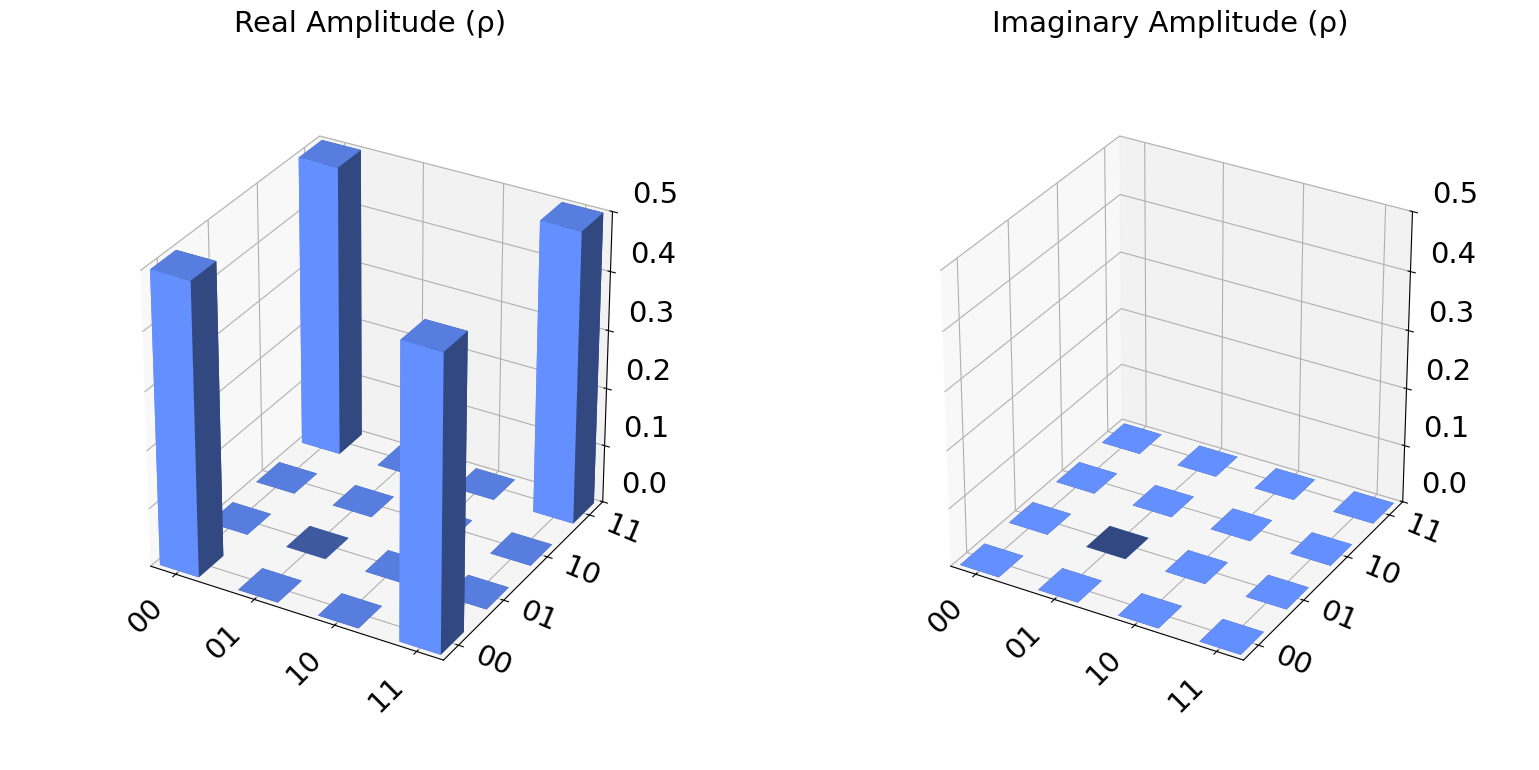

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import  DensityMatrix
from qiskit.visualization import plot_state_city, array_to_latex, plot_state_hinton

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

# plot state using a DensityMatrix
rho_state = DensityMatrix(qc)
display(array_to_latex(rho_state.data))
plot_state_city(rho_state)

It is clear that this expression satisfies the property that characterizes a *projector*

$$
\rho^2 = \rho
$$

and this is an equation that <u>*characterizes* density operators associated with pure states</u>


**By contrast**, for a mixed state we can see that $\rho^2 \neq \rho$
<br>
<br>
<br>
\begin{eqnarray}
\rho^2  &=&\left(
\sum_{\alpha} p_\alpha \ketbra{\psi_\alpha}{\psi_\alpha}\right)
\left(\sum_{\beta}p_\beta \ketbra{\psi_\beta}{\psi_\beta}\right) \\
&=& \sum_\alpha p_\alpha^2 \ketbra{\psi_\alpha}{\psi_\alpha} \\
&\neq &  \sum_\alpha p_\alpha \ketbra{\psi_\alpha}{\psi_\alpha} = \rho
\end{eqnarray}


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
    <b>Definition</b>: <i>(purity).</i>
We define the <i>purity</i> ${\cal P}$ of a state $\rho$ as the quantity 
<br>
<br>    
$${\cal P}(\rho) = \Tr \rho^2 $$
</div>    

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Lemma</b>:  ${\cal P}(\rho) \in [1/d,1]$, where  $d = \dim\Hil$. 
 ${\cal P}(\rho) = 1$ for $\rho$ a pure state, and  ${\cal P}(\rho) < 1$ for $\rho$ a mixed state.  
</div>

<details>
    <summary><p style="text-align: right ;color: navy"> >> <i>Proof</i> </p></summary>
On one hand, the value of $\Tr \rho^2$ is independent of the basis. Therefore we can compute it in the eigenbasis $\ket{\psi_a}$:
$$
\Tr \rho^2 = \Tr \left(\sum_a \lambda_a\ketbra{\psi_a}{\psi_a}\right)^2 = \sum_a \lambda_a^2
$$
But since each $\lambda_a \leq 1$, there are two possibilities:

- If there is only one nonzero eigenvalue, $\lambda_1 = 1$, the state is pure, and $\Tr \rho^2 = 1$.

- If there is more than one nonzero eigenvalue, the state is mixed and $\Tr\rho^2 < 1$.

</details>



In [6]:
# tr(\rho)
print(rho_state.trace())

# pureza = tr(\rho**2)
print(rho_state.purity())

(0.9999999999999998+0j)
(0.9999999999999996+0j)


## Maximally mixed state
<br>

At the opposite extreme of a pure state, we find a *maximally mixed*, or *depolarized* state,
in which  *all* the states in the mixture appear *with equal probability* $\{\ket{\psi_\alpha},p_\alpha = {1}/{d}\}, \alpha = 1,\dots,d$


$$
\rho = \sum_{\alpha=1}^d \tfrac{1}{d}\,\ket{\psi_\alpha}\bra{\psi_\alpha} = \tfrac{1}{d} I = \begin{bmatrix}1/d &  & \\  & \ddots & \\ & & 1/d \end{bmatrix}
$$

The purity of a maximally mixed state is  
$$
1 \geq \tr \rho^2 \geq  \sum_{i=1}^d \frac{1}{d^2} = \frac{1}{d}
$$

### Partially mixed state

Between the two extremes mentioned above—pure state and maximally mixed state—lies any generic state $\rho$. If we write

$$
\rho = \sum_{\alpha=0}^{r-1} p_\alpha \ket{\psi_\alpha}\bra{\psi_\alpha}
$$

even if $p_\alpha = 1/d$ when $r\neq d$, or if the states are not orthonormal $\braket{\psi_\alpha}{\psi_\beta}\neq \delta_{\alpha\beta}$, then the state is *partially mixed*.


<div class="alert alert-block alert-success">
<b>Exercise</b>:  
<br>
Using the function `get_density_operator`, randomly generate density operators for different values of \(r\) and \(d\).  
<br>
Verify that  $\mathrm{tr}\,\rho = 1$ and $ {\cal P}(\rho) = \mathrm{tr}(\rho^2)  \in [1/d, 1]$.
</div>


<div class="alert alert-block alert-success">
<b> Exercise </b>:     
<br> 
Given an operator $A\in \Lin(\Hil)$ verify that $\rho = A^\dagger A/\hbox{tr}( A^\dagger A)$ is a density operator 
</div>

## Thermal (Gibbs) State

A very important case of partial mixing is the *Gibbs state*, which describes a system when it reaches *thermal equilibrium at a temperature* $T$. In this case, the states $\{\ket{\psi_\alpha} = \ket{E_\alpha}\}$ form the *eigenbasis of the Hamiltonian operator*,

$$
H\ket{E_\alpha} = E_\alpha \ket{E_\alpha}
$$

and the eigenvalues $E_\alpha,\ \alpha = 1,2,\dots,d$ are the *energy levels* of the system.


When a system is in contact with a thermal bath at temperature $T$, the energy state is not well-defined, but rather a *statistical mixture* called the **canonical ensemble**

$$
\left\{\;\ket{E_\alpha},\; p_\alpha = e^{-E_\alpha/(k_B T)}\right\}
$$

- The coefficients $p_\alpha = e^{-E_\alpha/(k_B T)}$ are called *Boltzmann factors* and encode the probability of being found in the state (energy level) $\ket{E_\alpha}$.  
- The common denominator $k_B T$ is a characteristic energy for the temperature $T$, and $k_B$ is a universal constant called the *Boltzmann constant*.


The density matrix describing the state of this system is the so-called *Gibbs state*

$$
\rho(T) = \frac{1}{Z}\sum_{\alpha=1}^d e^{-E_\alpha/k_BT} \ket{E_\alpha}\bra{E_\alpha} \;=\; \frac{1}{Z} 
\begin{bmatrix}
e^{-E_0/k_BT} &  & \\ 
& e^{-E_1/k_BT} & \\ 
&  & \ddots  
\end{bmatrix} \,,
$$

where \(Z = \sum_{\alpha=1}^d e^{-E_\alpha/k_BT}\) is called the *partition function* and provides the *necessary normalization* so that \(\Tr\rho(T) = 1\).


The energy of the system at each temperature is given by an average over all eigenstates weighted by the density matrix at that temperature

$$
\langle E \rangle_T = \tr \bigl(\rho(T)\, H\bigr)
$$


<div class="alert alert-block alert-success">
<b>Exercise:</b> prove that we recover the pure and maximally mixed cases in the following limits

-   $\rho(T=0) = \ketbra{E_0}{E_0}$
<br>


-   $\rho(T=\infty) = \frac{1}{d} I$
</div>   

<div class="alert alert-block alert-success">
<b>Exercise:</b> Randomly generate a Gibbs state at temperature $T$ and plot the values of $p_\alpha(T)$ for different values of $T$ (take $k_B=1$).
<br>
</div>


<a id='Blochball'></a>

## Mixed state of a qubit


Over $\Hil = {\mathbb C}^2$, the most general density matrix can be expanded in the basis $\{ I, \sigma_x, \sigma_y, \sigma_z \}$

$$
\rho = \frac{1}{2} \bigl( I + {\bf u}\cdot \boldsymbol\sigma \bigr)
$$

where ${\bf u} = (u_x, u_y, u_z)$ is a three-dimensional real vector.


Writing $\rho$ explicitly, with $|\mathbf{u}| = u$, one finds that

$$
\det \rho = \frac{1}{4}(1 - u^2) = \frac{1}{4}(1+u)(1-u) = \lambda_+\lambda_-
$$

which implies that the *eigenvalues* of $\rho$ are $\lambda_\pm = \frac{1}{2}(1\pm u)$


For $\rho$ to be positive semidefinite, it must hold that


$$
0\leq u\leq 1
$$


Writing ${\bf u} = u (\sin\theta \cos\phi, \sin\theta\sin\phi, \cos\theta)$ in polar coordinates, we can parametrize a mixed qubit as a point in the <i>Bloch sphere</i> $|{\bf u}|\leq 1$ in the form
    
$$
\ket{\psi} = u\left(\cos\theta\ket{0} + e^{i\phi}\sin\theta \ket{1} \right) 
$$    
where $u\in [0,1]$. This is only symbolic notation, since $\ket{\psi}$ is not a quantum state.


We encounter the two limiting cases

-  $|{\bf u}| = 0 \to \lambda_+ = \lambda_- = 1/2$, at the *center of the Bloch ball*  
In this case the qubit is in a maximally mixed state.

$$
\rho = \begin{bmatrix} 1/2 & 0 \\ 0 & 1/2 \end{bmatrix}
$$

- $|{\bf u}| = 1 \to \lambda_+ = 1, \lambda_- = 0$, on the *Bloch sphere*  
In this case the qubit is in a pure state. For example, with $u = (0,0,1)$

$$
\rho = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} = \ket{0}\bra{0} = \rho^2
$$


<a id='measure_mixed'></a>

# Measurements on mixed states

[<<<](#top)



The scenario now is a general state $\rho$ on which we perform a measurement associated with an *observable* that admits a spectral decomposition  
<br>
<br>

$$
A = \sum_n \lambda_n \ketbra{\lambda_n}{\lambda_n} = \sum_n \lambda_n P_n
$$

where the projection operator $P_n = \ket{\lambda_n}\bra{\lambda_n}$.


We have already seen how to write the probability of measuring the eigenvalue $\lambda_n$ at the beginning of this chapter

$$
p(\lambda_n) = \bra{\lambda_n}\rho \ket{\lambda_n}
$$


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Axiom IV</b>: <i>(mesurement and collapse).</i>
<br>
<br>    
    After a measurement, if the outcome was $\lambda_m$, the <i>mixed</i> state $\rho$ collapses a <i>pure</i> state $\rho_m = \ketbra{\lambda_m}{\lambda_m}$. 
</p>
</div>

That is, we can associate with a measurement the following map between operators

$$
\rho \;\to\; \ketbra{\lambda_m}{\lambda_m} \;=\; \frac{P_m \rho P_m}{p(\lambda_m)} \,.
$$

<br>
<details style="color:navy">
<br>
\begin{eqnarray}
\ketbra{\lambda_m}{\lambda_m} &=& \frac{p(\lambda_m)\,\ketbra{\lambda_m}{\lambda_m}}{p(\lambda_m)} \;=\;
     \frac{\ketbra{\lambda_m}{\lambda_m}\,\rho\,\ketbra{\lambda_m}{\lambda_m}}{p(\lambda_m)} \;=\; \frac{P_m \rho P_m}{p(\lambda_m)}
\end{eqnarray}
</details>


<a id='valesp_mezcla'></a>
## Expected Value in a Mixed State


 Let us manipulate this expression


\begin{eqnarray}
p(\lambda_n) &=& \bra{\lambda_n}\rho\ket{\lambda_n} = \sum_i  \braket{\lambda_n}{i}\bra{i}\rho\ket{\lambda_n} =
\sum_i \bra{i}\rho\ket{\lambda_n}\braket{\lambda_n}{i} = \sum_i \bra{i}\left( \rho\ket{\lambda_n}\bra{\lambda_n}\rule{0mm}{5mm}\right)\ket{i} \nonumber\\
&\equiv& \tr(\rho P_n )
\end{eqnarray}

Now we can find the expectation value of  $A$

\begin{eqnarray}
\langle A\rangle_\rho &=& \sum_n \lambda_n p(\lambda_n) = \sum_n \lambda_n \tr(\rho P_n ) 
     = \tr \left( \rho \sum_n \lambda_n P_n \right) = \tr (\rho A)
\end{eqnarray}

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Lemma</b>: $~$ the expectation value of an observable $A$ in a <i>state</i>  $\rho$ is
<br>
<br>    
$$
~~ \langle A\rangle_\rho = {\tr}(\rho A)  
$$
<br>
</p>
</div>


<div class="alert alert-block alert-success">
<b>Exercise:</b> 
$~$demuestra que, en el caso  $d=2$,  dado un estado $\rho$, podemos recuperar el punto ${\bf u}$ de la bola de Bloch, calculando los valores esperados de las matrices de Pauli $\sigma_i$

$$
\langle \sigma_i \rangle = \tr(\rho \sigma_i) = u_i
$$
</div>

<div class="alert alert-block alert-success">
<b> Exercise </b>:    genera  operadores densidad con $d=2$ usando la función <i>get_density_operator</i> y obtén, en cada caso, el valor del vector  ${\bf u}$ y su módulo $u$. Observa la variación con $r$. 
    
Para $r=d=2$ genera un estado $\rho$ máximamente mezclado y verifica que ${\bf u} = 0$.
</div>

<a id='pop_coh'></a>
# Populations and coherences

[<<<](#top)

Consider 

- a mixed state $\rho = \sum_i p_i \ketbra{\psi_i}{\psi_i}$. 


- an orthonormal basis $\ket{\lambda_n}$. In this basis the possible states are expanded as

$$
\ket{\psi_i} = \sum_n c^{(i)}_n \ket{\lambda_n}
$$

with complex amplitudes $
c_n^{(i)} = \braket{\lambda_n}{\psi_i} \,  $
that define the probabilities $p^{(i)}_n = |c_n^{(i)}|^2$ of measuring $\lambda_n$ **if** the system were in the pure state $\ket{\psi_i}$.



What is the significance of the matrix elements $\rho_{mn}$?
$$
\begin{align}
\rho_{nm} &= \bra{\lambda_n}\rho \ket{\lambda_m} =
\bra{\lambda_n}\left(\sum_i p_i \ket{\psi_i}\bra{\psi_i}\right)\ket{\lambda_m}
= \sum_i p_i \braket{\lambda_n}{\psi_i}\braket{\psi_i}{\lambda_m} \\
&= \sum_i p_i c^{(i)}_n c^{(i)*}_m
\end{align}
$$


## Populations:

<br>

Let us take $\underline{n=m}$
$$
\rho_{nn} = \sum_i p_i |c_n^{(i)}|^2 
$$
is the **average probability** of finding the system in state $\ket{\lambda_n}$. Notice that $\rho_{nn}\geq 0$. 
<br>

For this reason, it is called the *population*: if $N$ measurements are performed on the system, on average, $N\rho_{nn}$ of them will yield the state $\ket{\lambda_n}$ as a result.


## Coherences: 
<br>
Now, with $\underline{n\neq m}$. 

Let us imagine first that the system is pure $\rho = \ketbra{\psi_1}{\psi_1}$
$$
\rho_{nm} =   c_n^{(1)}c_m^{(1)*}
$$

The off-diagonal terms being non-zero signals: of which basis states $\ket{\lambda_n}$,  the state $\ket{\psi_1}$ is a coherent superposition. 

For this reason, the off-diagonal elements of $\rho$ are called *coherences*. 

Now, back to a mixed state

$$
\rho_{nm} =   \sum_i p_i c_n^{(i)}c_m^{(i)*}
$$

In this case, it is the <i>average of the cross terms</i> (interference) between $\ket{\lambda_n}$ and $\ket{\lambda_m}$, given  that the states $\ket{\psi_i}$ are  *coherent superpositions* of them.  


Now, since $c_n^{(i)}c_m^{(i)*}$ are complex numbers, $\rho_{mn} $ can vanish. 

If this happens, the statistical mixture will have erased all traces of interference between $\ket{\lambda_n}$ and $\ket{\lambda_m}$.

On the other hand, if $\rho_{nm}\neq 0$, there still remains a certain degree of coherence between these states in the statistical mixture.


In the course of its evolution, an *open quantum system*  will gradually lose its *coherences* $\rho_{nm} \to 0$ for $n \neq m$.  

This process will be studied later and is called **decoherence**.


<div class="alert alert-block alert-success">
<b>Exercise</b>:  
Generate the density operator associated with the maximal mixture of Bell states  
$\{\ket{B_{ij}},\; p_{ij} = 1/4\}$.

Perturb the probabilities $p_{ij}$ and observe the structure of the populations and coherences.
</div>


<div class="alert alert-block alert-danger">
<b>Notar:</b> 
The distinction between populations and coherences is basis dependent. 
    
- We may always diagonalize $\rho = \sum_i \pi_i \ketbra{\mu_i}{\mu_i}$ and interpret $\rho$ as a statistical mixture of state $\ket{\mu_i}$ with probabilities $p_i$. There are *no coherences* in this basis. 
<br>
    
- If $\ket{u_n}$ is the basis of eigenstates of the Hamiltonian $H \ket{u_n} = E_n \ket{u_n}$,
then from the Von Neumann evolution equation $i\hbar\dot \rho = [H,\rho]$ we obtain
<br>
\begin{align}
i\hbar \dot \rho_{nn}(t) &= 0 \\
i\hbar \dot \rho_{nm}(t) &= (E_n-E_m)\rho_{nm}
\end{align}
whose solution is as follows
<br>
$$
\rho_{nn}(t) = \hbox{cte.} ~~~~~~,~~~~~~\rho_{nm}(t) = e^{\frac{i}{\hbar}(E_m - E_n)t} \rho_{nm}(0)
$$
<br>    
Hece populations are constant, but coherences oscillate in time under unitary evolution. 
<br> 
<br>    
- Using that $\ket{u}\rho\bra{u}\geq 0$ it is easy to prove that
$$
\rho_{nn} \rho_{mm} \geq |\rho_{nm}|^2
$$
<br>
Hence  coherences can only exist among states with non-vanishing populations.
    
</div>

<a id="fidelity"></a>
# Fidelity
</table>   

[<<<](#top)


Given two density operators $\rho_1$ and $\rho_2$, it is useful to have a way to *measure* how similar or different they are. It is important that this quantity does not depend on the choice of basis.


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Definition:</b> (<i> Fidelity </i>)
    For two density operators $\rho_1$ and $\rho_2$, the <i> fidelity </i> is defined as  
<br>
<br>
$$
F(\rho_1,\rho_2) = \tr \sqrt{\sqrt{\rho_1} \rho_2\sqrt{\rho_1}}
$$

Fidelity is related to the [trace norm](../00_Formalismo/01_Operadores.ipynb#trace_norm). Indeed,


\begin{align}
F(\rho_1,\rho_2) &= \tr \sqrt{\sqrt{\rho_1}\rho_2\sqrt{\rho_1}} = 
\tr \sqrt{\sqrt{\rho_1\rho_2}\sqrt{\rho_2\rho_1}}\\
&= \tr \sqrt{\sqrt{\rho_1^\dagger\rho_2^\dagger\rule{0mm}{3.8mm}}\sqrt{\rho_2\rho_1}}
= \tr \sqrt{\sqrt{\rho_2\rho_1}^\dagger\rule{0mm}{3.8mm}\sqrt{\rho_2\rho_1}}= \|\sqrt{ \rho_2 \rho_1}\|_1  
\end{align}

**Properties:**

- $F(\rho_1,\rho_2) = F(\rho_2,\rho_1)$
<br>
<br>
- $F(\rho_1,\rho_2) \in [0,1]$ which maximizes when they are equal   $F(\rho,\rho) =1$
<br>
<br>
- $F(\rho_1,\rho_2) = F(\rho'_1, \rho'_2) ~~\Leftrightarrow  ~~ \rho'_1 = U^\dagger \rho_1 U \hbox{ and } \rho'_2 = U^\dagger \rho_2 U$

**Particular Cases**

- If $\rho_1 = \ket{\psi_1}\bra{\psi_1}$ is a pure state, then $F(\rho_1,\rho_2) = \sqrt{\bra{\psi_1} \rho_2 \ket{\psi_1}}$


*Proof*, if $\rho_1 = \rho_1^2$ being pure

<br>
\begin{eqnarray}
\tr \sqrt{\sqrt{\rho_1}\rho_2\sqrt{\rho_1}} &=& \tr \sqrt{\rho_1\rho_2\rho_1} \\ &=&
\tr \sqrt{\ket{\psi_1}\bra{\psi_1}\rho_2\ket{\psi_1}\bra{\psi_1}} \nonumber\\
&=& \sqrt{\bra{\psi_1}\rho_2\ket{\psi_1}} \tr \sqrt{\rho_1}\\ &=&  \sqrt{\bra{\psi_1}\rho_2\ket{\psi_1}}
\end{eqnarray}
<br>




-  If  $\rho_1=\ket{\psi_1}\bra{\psi_1}$ and  $\rho_2=\ket{\psi_2}\bra{\psi_2}$ both are pure, then
<br>
<br>
$$F(\rho_1,\rho_2) = | \braket{\psi_1}{\psi_2}|\in (0,1)\, $$
<br>
the fidelity boils down to the usual scalar product among vectors

- If $[\rho_1, \rho_2] = 0$, then there exists a basis $\ket{i}$ that diagonalizes both operators: $\rho_{1,2} = \sum_i p^{(1,2)}_i \ket{i}\bra{i}$. In this case:

<br>

$$F(\rho_1, \rho_2) = \sum_j \sqrt{p^{(1)}_j p^{(2)}_j}$$

which is the fidelity between two classical probability distributions $\{p^{(1,2)}_i\}$.


*Proof*

\begin{eqnarray}
\tr \sqrt{\sqrt{\rho_1}\rho_2\sqrt{\rho_1}} &=& \tr \sqrt{\sum_i \sqrt{p^{(1)}_i}\ket{i}\bra{i}\sum_j p^{(2)}_j\ket{j}\bra{j}\sum_k \sqrt{p^{(1)}_k}\ket{k}\bra{k}} \\
&=& \tr\sqrt{\sum_i p^{(1)}_i{p^{(2)}_i}\ket{i}\bra{i}} = \tr \left(\sum_i \sqrt{p^{(1)}_i{p^{(2)}_i}}\ket{i}\bra{i}\right)  \\
&=& \sum_j \sqrt{p^{(1)}_j p^{(2)}_j}
\end{eqnarray}
<br>



*Fidelity* and *trace distance* parametrize the same notion (or rather, reciprocals of each other).

\begin{align}
D(\rho_1,\rho_2) &= \frac{1}{2} \| \rho_1 - \rho_2 \|_1 \\  \rule{0mm}{8mm}
&\equiv \frac{1}{2} \tr \sqrt{( \rho_1 - \rho_2)^\dagger( \rho_1 - \rho_2)}
\end{align}



In general, $D$ is easier to compute than $F$. Knowing $D$, we can bound $F$:

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Theorem:</b> (<i> Fuchs–van de Graaf </i>)
<br><br>    
$$
1 - \sqrt{F(\rho_1,\rho_2)} \leq D(\rho_1,\rho_2) \leq \sqrt{1 - F(\rho_1,\rho_2)}
$$
<br>
</div>    

or, equivalently:

$$
\left(1 - D(\rho_1,\rho_2)\right)^2 \leq F(\rho_1,\rho_2) \leq 1 - D(\rho_1,\rho_2)^2
$$



<a id='multimix'></a>
# Subsystems  


[<<<](#top)


A very common case occurs when the total system is composed of two subsystems $A$ and $B$.

In this case, the total Hilbert space is the tensor product $\Hil = \Hil_A \otimes \Hil_B$.


Let us consider bases  
\begin{eqnarray}
~\{\ket{i}\},\, &&  i=0,...,d_A-1 ~\text{ of } ~\Hil_A \\ \rule{0mm}{14mm}
~\{\ket{a}\},\, && a=0,...,d_B-1 ~\text{ of } ~\Hil_B
\end{eqnarray}

The canonical basis of $\Hil$ is given by all the ordered pairs

$$
\ket{ia} = \ket{i}\otimes \ket{a}
$$

which form a set of $d_A d_B$ orthonormal vectors.


<div class="alert alert-block alert-warning">
<b>Example</b>:  
Consider a quantum computer with $n = n_A + n_B$ qubits.  

The Hilbert space $\Hil = \Hil_A \otimes \Hil_B$, of dimension $d = 2^n$, will have as its basis the $2^n$ states  
$\{\ket{\alpha} = \ket{i_0\ldots i_{n-1}}\}$ where $i_k = 0,1$.  

But we can separate it into the direct sum of the bases of $\Hil_A$ and $\Hil_B$
<br>        
$$
\ket{i} = \ket{i_1\ldots i_{n_A}0\ldots0} ~~~~~~~~~,~~~~~~~~~\ket{a} = \ket{0\ldots0\, i_{n_A +1}\ldots i_{n_A + n_B}}
$$
<br>
with $i = 0,\ldots,2^{n_A}-1$ and $a = 0,\ldots, 2^{n_B}-1$. Clearly,

$$
\ket{\alpha} = \ket{ia} = \ket{i}\otimes \ket{a}
$$
</div>


In this basis, an arbitrary density operator is expanded in terms of a *density matrix* $\rho_{ia,jb}$ in the form  
<br>

$$
\rho = \sum_{i,j=0}^{d_A-1} \sum_{a,b=0}^{d_B-1} \rho_{ia~jb} \ket{ia}\bra{jb}
$$


as long as it satisfies the following three conditions:

- Hermiticity: $\Rightarrow \rho_{ia~jb} = \rho_{jb~ia}^*$  
<br>

- Positive semidefiniteness *i.e.*, for all eigenvalues $\Rightarrow ~\lambda_{ia} \geq 0$  
<br>

- Probability conservation: $~\Tr \rho = \sum_{i=0}^{d_A-1} \sum_{a=0}^{d_B-1} \rho_{ia~ia} = 1$


<div class="alert alert-block alert-danger">
<b>Note</b>:  
As usual, we can relabel the bi-indices of $\rho$ so that $\rho_{ia,jb} = \rho_{\alpha\beta}$
<br>
<br>    
$$
\alpha = d_B i + a~~,~~\beta = d_B j + b
$$
<br>
If $i,j = 0,\ldots, d_A - 1$ and $a,b = 0,\ldots, d_B - 1$, then $\alpha, \beta = 0,1,\ldots, d_A d_B - 1$.
</div>


The statement `numpy.reshape` arranges the $d_A d_B$ data in either of the two forms


In [7]:
import numpy as np
' define a matrix of an operador on H_A*H_B'
dA = 2 #4
dB = 10  #5

A = np.random.rand(dA,dB,dA,dB)
B = np.random.rand(dA*dB,dA*dB)

'component map'
i=1 
a=2 
j=1 
b=1
alpha = dB*i + a
beta  = dB*j + b
print('ia,jb==',i,a,',',j,b,'   alpha,beta=',alpha,beta)

print("A_{ia,jb}=", A[i,a,j,b],'     B_{alpha,beta}=',B[alpha,beta])

ia,jb== 1 2 , 1 1    alpha,beta= 12 11
A_{ia,jb}= 0.14033948981474842      B_{alpha,beta}= 0.30914841923158165


In [8]:
'reshape and read the same component'
Aresh = A.reshape(dA*dB,dA*dB)
Bresh = B.reshape(dA,dB,dA,dB)
print("A_{alpha,beta}=", Aresh[alpha,beta],'B_{i,a,j,b]}=',Bresh[i,a,j,b])

A_{alpha,beta}= 0.14033948981474842 B_{i,a,j,b]}= 0.30914841923158165


## Partial Trace

We are going to study bipartite systems. A state of such a system is  
$\rho \in \Lin(\Hil_A \otimes \Hil_B)$. With this, we can compute all expectation values of observables  
defined over the entire system
$$
\langle A \rangle_\rho = \Tr(\rho A)
$$

An observable defined only on one part, $A \otimes I$ or $I \otimes B$, has no access to information contained in the other Hilbert space.

For this type of observables, we can define states $\rho_A \in \Lin(\Hil_A)$ and  
$\rho_B \in \Lin(\Hil_B)$ through the operation of *partial trace*:

$$
\rho_A \equiv {\rm Tr}_B \rho \quad , \quad \rho_B \equiv {\rm Tr}_A \rho
$$

Let us now see the form of these two operators in a basis $\ket{i} \otimes \ket{c} = \ket{ic}$ of $\Hil_A \otimes \Hil_B$


\begin{align}
\rho_A \equiv {\rm Tr}_B\rho &= \sum_{c=0}^{d_B-1} \bra{c} \rho \ket{c} \nonumber\\
    &= \sum_{c=0}^{d_B-1} \bra{c} \left( \sum_{i,j=0}^{d_A-1} \sum_{a,b=0}^{d_B-1} \rho_{ia,jb}\ket{i}\ket{a}\bra{j}\bra{b} \right) \ket{c} \nonumber \\
    &= \sum_{c=0}^{d_B-1}  \left( \sum_{i,j=0}^{d_A-1} \sum_{a,b=0}^{d_B-1} \rho_{ia,jb}\ket{i}\braket{c}{a}\bra{j}\braket{b}{c} \right)   \nonumber\\
    &= \sum_{c=0}^{d_B-1}  \left( \sum_{i,j=0}^{d_A-1}  \rho_{ic,jc}\ketbra{i}{j} \right)   \nonumber\\
    &=  \sum_{i,j=0}^{d_A-1}   \left( \sum_{c=0}^{d_B-1} \rho_{ic,jc} \right) \ketbra{i}{j}   ~~ = ~   \sum_{i,j=0}^{d_A-1}   \rho_{A,i,j}  \ketbra{i}{j}   \nonumber
\end{align}

Then, the density matrices associated with the partial traces are, respectively:
$$
\rho_A = \Tr_B \rho \to \rho_{A,ij}= \sum_{a=0}^{d_B-1} \rho_{ia~ja} ~~~~~~~,~~~~~~~ \rho_B = \Tr_A\rho \to \rho_{B,ab} = \sum_{i=0}^{d_A-1} \rho_{ia~ib}
$$

The states obtained in this way are sufficient to recover the probabilities of measurement outcomes that affect only one of the subsystems.

<div class="alert alert-block alert-info" style="text-align: center;">
<p style="text-align: left; color: navy;">  
<b>Lemma</b>:  
<br>
Let $O = O_A \otimes I$ be an observable that measures only a property of <i>subsystem</i> $A$, then  
<br><br>
$$
\langle O \rangle_\rho = \tr(O_A \rho_A)
$$
</p>   
</div>


<i>Proof</i> 

\begin{eqnarray}
 \langle O \rangle_\rho  ~=~ \Tr ((O_A\otimes I)\rho) &~=~&
 \sum_{i=0}^{d_A-1}\sum_{a=0}^{d_B-1} \bra{i}\bra{a} \left( (O_A\otimes I)\rho \rule{0mm}{4mm}\right) \ket{i}\ket{a} \\
 \rule{0mm}{4mm}
 &=& \sum_{i=0}^{d_A-1} \bra{i} O_A  \sum_{a=0}^{d_B-1}\bra{a}\rho \ket{a}\ket{i} \\
 &=& \sum_{i=0}^{d_A-1} \bra{i} O_A  \rho^A\ket{i} \\
 &=& \Tr(O_A\rho^A)
\end{eqnarray}


<div class="alert alert-block alert-success">
<b>Exercise:</b> <i>(explain it to your computer)</i>
<br><br>

Define a Python function <i>get_partial_traces</i> that takes as arguments a matrix $\rho$ of dimension $d = d_A d_B$,   and the values $d_A$ and $d_B$ as the dimensions of $\Hil_A$ and $\Hil_B$ such that $\Hil = \Hil_A\otimes \Hil_B$.
<br>
<br> 
The function should return the two density matrices $\rho_A$ and $\rho_B$ obtained via partial traces.  
<br>

Examine the cases where $\rho$ is pure or mixed, as well as the case where $\rho = \ket{\psi}\bra{\psi}$  
with $\ket{\psi}$ factorizable.
</div>


## Mixed States and Quantum Circuits



At the end of the day, a quantum circuit is just a device that *samples* from a probability distribution,  
producing bit strings $s_i$ with probabilities $p_i$.

Let us suppose a circuit generates a bipartite state $\ket{\psi} = \sum_{ij} c_{ij} \ket{ij}$.  
The computer samples the values $ij$ and constructs histograms with $d^2$ columns of height $n_{ij}$ that converge to the corresponding probabilities. 
<br>

Let us consider a concrete case: $i = j = 0$.

$$
\frac{n_{00}}{N} ~\hookrightarrow ~ p_{00} = |c_{00}|^2 = \braket{\psi}{00}\braket{00}{\psi} = \tr\, (\rho \ketbra{00}{00})
=  \tr\, (\rho P_{00})
$$

where $\rho = \ketbra{\psi}{\psi}$ is the density matrix associated with the pure state $\ket{\psi}$.


What happens if we only measure the first qubit? The output will now produce a histogram with $d$ values $n_i$.  

There is an equivalent way to express this, which consists in summing over $j$ to obtain the *marginal* distribution

$$
\frac{n_i}{N} = \sum_j \frac{n_{ij}}{N} ~ \longrightarrow ~ q_i = \sum_j p_{ij}
$$

That is, the fractions $n_i/N$ reconstruct the marginal probabilities of the original random variable.

Let us return to the specific case $n_i \to n_0$. Now:


\begin{align}
\frac{n_0}{N} \to \sum_j p_{0j} &= \sum_j c_{0j}^* c_{0j} \\
&= \left(\sum_{ij}c_{ij}^* \bra{ij}\right)\left(\ketbra{0}{0}\otimes I\right) \left(\sum_{l} c_{lj}\ket{lj}\right)
\\
&= \left(\sum_{ij}c_{ij}^* \bra{i}\right) \ketbra{0}{0}  \left(\sum_{l} c_{lj}\ket{l}\right)\\
&= \left(\sum_{ij}c_{ij}^* \bra{i}\right) \left(\sum_m\ketbra{m}{m}\right) \ketbra{0}{0}  \left(\sum_{l} c_{lj}\ket{l}\right)\\
&= \sum_m\bra{m}\left(  \ketbra{0}{0}   \sum_{il} \rho_{1,{il}}   \ketbra{l}{i}  \right)\ket{m} ~=~ \tr \left( \ketbra{0}{0}\rho_1\right)
\end{align}



where $\rho_1$ is now the reduced density matrix.
$$
\rho_{1,il} = \sum_j c_{ij}^*c_{ij} = \sum_j \rho_{ij,lj}
$$

<div class="alert alert-block alert-danger">
<b>Summary</b>:  
<br>    
<br>    
in a circuit of <i>width</i> (number of qubits) $q = q_A + q_B$,  the state associated to a partial measurement of the first  $q_A$ qubits is represented by $\rho_A = \mathrm{tr}_B \ket{\psi}\bra{\psi}$ where $\ket{\psi}$ is the pure state created by the full circuit.
</div>    

<div class="alert alert-block alert-success">
<b>Exercise:</b>  
Consider the state generated by the circuit  
$\ket{\psi} = \mathrm{CNOT}(1,0)\,\mathrm{CNOT}(0,2)\,H(1)\, R_x(\alpha,0)\ket{000}$  
with $\alpha = \pi/3$.

Compute the partial density matrices:  
$\rho_B = \tr_{01}(\ket{\psi}\bra{\psi})$ and  
$\rho_A = \tr_{2}(\ket{\psi}\bra{\psi})$.  

Verify that they correspond to identical operators, and compute their purity.
</div>


<div class="alert alert-block alert-success">
<b>Exercise:</b> In the circuit from the previous exercise:

- Obtain experimentally the expectation value $\langle Z_2 \rangle_B$ and compare it with the prediction $\tr(Z \rho_B)$  
<br>

- Obtain experimentally the expectation value $\langle Z_0 Z_1 \rangle_A$ and compare it with the prediction $\tr(Z \otimes Z \cdot \rho_{01})$  
<br>

- Repeat for $\langle X_2 \rangle_B$ and $\langle Z_0 X_1 \rangle_A$
</div>


## State Tomography

State tomography refers to the process of characterising a quantum state $\rho$. The most general $n$ qubit density matrix can be expressed as follows

$$
\rho = \frac{1}{2^n}  \sum_{i_1...i_n =0}^4 c_{i_1...i_n} \Ps_{i_1...i_n}
$$
in terms of Pauli strings $\Ps_{ij...} = \sigma_i\otimes \sigma_j\otimes...$ ,  and $c_{0...0} = 1$. 

From here the coefficients can be recovered from the expectation values of Pauli strings

$$
\langle \Ps_{k_1...k_n} \rangle_\rho = \Tr (\rho  \Ps_{k_1...k_n})  = c_{k_1...k_n} 
$$

<a id='impurif'></a>

# Purification and Impurification


[<<<](#top)


Let us see that there is a close relationship between the entanglement of a pure state and the degree of mixedness of a density matrix that we can construct via a partial trace.


## Partial trace of a pure state



Suppose that $\rho \in \, \Lin(\Hil_A\otimes\Hil_B)$ is a **pure** bipartite state. The density matrix is a projector
<br>
<br>
$$\rho=\ket{\Psi}\bra{\Psi}~~~\Rightarrow ~~~ \rho=\rho^2$$ 


    
We are going to prove **three important results** related to the *reduced density matrix*.

$$\rho\to \rho_A = \tr_B\rho$$



<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>1.-</b> If $\rho$ is a pure state $( \rho = \rho^2)$, then the two reduced operators are equal:
    $~\Rightarrow \rho_A = \rho_B$
</div>


**Proof:**

The way to prove this result is to work in the Schmidt basis for the bipartite state

$$
\rho = \ketbra{\Psi}{\Psi} ~~~\text{with} ~~~\ket{\Psi}  = \sum_{\alpha=1}^r \sqrt{\lambda_\alpha}\ket{f_\alpha}\ket{\tilde f_\alpha}
$$

Then, for the partial trace over $B$, we write



<br>
\begin{eqnarray}
\rho_A ~=~ \Tr_B \ket{\Psi}\bra{\Psi} &~=~&
\sum_{\sigma=0}^{d_B-1} \braket{\tilde f_\sigma}{\Psi}   \braket{\Psi}{\tilde f_\sigma} \\
&~=~& \sum_{\sigma=0}^{d_B-1} \bra{\tilde f_\sigma}\left( \sum_{\alpha, \beta=0}^{r-1} \sqrt{\lambda_\alpha}\sqrt{\lambda_\beta}\ket{f_\alpha}\ket{\tilde f_\alpha}\bra{f_\beta}\bra{\tilde f_\beta} \right)
\ket{\tilde f_\sigma} \\
&=&\sum_\sigma\sum_{\alpha \beta} \sqrt{\lambda_\alpha}\sqrt{\lambda_\beta}\ket{f_\alpha}\braket{\tilde f_\sigma}{\tilde f_\alpha}\bra{ f_\beta}\braket{\tilde f_\beta}{\tilde f_\sigma}\\
&=&\sum_\sigma\sum_{\alpha \beta} \sqrt{\lambda_\alpha}\sqrt{\lambda_\beta}\ket{f_\alpha}\bra{f_\beta}\delta_{\sigma\alpha}\delta_{\beta\sigma} \\
&=&  \sum_{\sigma=0}^{r-1} \lambda_\sigma\ket{f_\sigma}\bra{f_\sigma}
\end{eqnarray}



Proceeding in the same way, it is immediate to prove the converse:

$$
\rho_B ~=~ \Tr_A \ket{\Psi}\bra{\Psi} = \sum_{\sigma=0}^{r-1} \lambda_\sigma\ket{\tilde f_\sigma}\bra{\tilde f_\sigma}
$$

Then, the reduced density matrix in both cases is the same diagonal matrix given by the Schmidt coefficients:

$$
\rho^A  = \rho^B = \hbox{diag} ( \lambda_0,\lambda_1,...,\lambda_r, 0 ,... )
$$


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>2.-</b>  $~$ If $\ket{\psi} = \ket{\varphi}\otimes \ket{\phi}$ is <b>factorizable</b>, then $\Rightarrow$ $\rho_A$ remains <b>pure</b>
</p>   
</div>


**Proof:**

\begin{eqnarray}
 \rho_A = \Tr_{B}\ketbra{\Psi}{\Psi} &=& \sum_{b}\bra{b}\left(\rule{0mm}{4mm} \ketbra{\varphi}{\varphi}\otimes \ketbra{\phi}{\phi}\right) \ket{b}\\
 &=&   \ketbra{\varphi}{\varphi} \sum_b \braket{b}{\phi}\braket{\phi}{b}\\
 &=&   \ketbra{\varphi}{\varphi}  \bra{\phi}\left(\sum_b\ketbra{b}{b}\right)\ket{\phi}\\
 &=&   \ketbra{\varphi}{\varphi}\braket{\phi}{\phi} ~= ~ \ketbra{\varphi}{\varphi} ~ = ~ (\rho^A)^2
\end{eqnarray}


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
3.-$~$   $\ket{\psi}$ <b>entangled</b> $~\Rightarrow ~ \rho_A$ <b>mixed</b>
</p>   
</div>

**Proof**:
<br>

If $\ket{\psi}$ is entangled, in the Schmidt basis $r > 1$. Then clearly
<br>
<br>
$$
\rho_A = \sum_{\sigma=0}^{r-1} \lambda_\sigma\ket{f_\sigma}\bra{f_\sigma}
$$
<br>
is not a projector, $\rho \neq \rho^2$, and therefore it corresponds to a mixed state.
<br>


In summary: <u> under the application of <i>partial trace</i>, <i>entanglement</i> induces <i>mixing</i></u>

This result allows us to define a *figure of merit* to quantify the entanglement of a state, consisting of partitioning the Hilbert space in different ways, and calculating, for each partition, the purity of the state obtained via partial trace.


## Purification of a mixed state


We have already seen how a density matrix describes the *a priori probabilities* when we perform *restricted* measurements on a subspace of the Hilbert space.

Conversely, if $\rho \neq \rho^2$ is a density matrix corresponding to a mixed state, we can always <u>design a pure state that contains this mixed state under restriction</u>.


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Theorem</b>: <i>(Purification)</i>
<br>
<br>    
Let $\rho \in \Lin(\Hil_1)$ be a density operator: we can <i>always</i> define a pure state $\ket{\Psi}\in \Hil_1\otimes \Hil_2$ for some Hilbert space $\Hil_2$, with $\hbox{dim} \Hil_2 \geq \hbox{dim} \Hil_1$, such that
<br>
<br>
$$
\rho = \tr_{\Hil_2}\ket{\Psi}\bra{\Psi}
$$
<br>
</p>
</div>


<i> Proof</i>:  
The proof proceeds by expressing $\rho$ in its spectral decomposition:

$$
\rho = \sum_{a=1}^{d_1} p_a \ketbra{\psi_a}{\psi_a}
$$

where $p_a \geq 0$ and $\ket{\psi_a}$ is a set of orthonormal eigenvectors. Let $\Hil_2$ be a Hilbert space with dimension $d_2 \geq d_1$. In the product space $\Hil_1 \otimes \Hil_2$, consider the state

$$
\ket{\Psi} = \sum_a \sqrt{p_a}\ket{\psi_a} \otimes \ket{\phi_a}
$$

where $\{\phi_a\}_{a=1,...,d_1} \in \Hil_2$ is an **orthonormal set of vectors**, otherwise completely arbitrary.  

Let us now show that the partial trace recovers $\rho$:



\begin{eqnarray}
\tr_{{\cal H}_2} \rho ~=~\tr_{{\cal H}_2}  \ket{\Psi}\bra{\Psi} &=& \sum_{\alpha=1}^{d_2}\bra{e_\alpha} \left( \sum_{a,b=1}^{d_1} \sqrt{p_a}\sqrt{p_b} \ket{\psi_a}\otimes\ket{\phi_a}\bra{\psi_b} \otimes \bra{\phi_b}\right) \ket{e_\alpha} 
\nonumber\\
&=& \sum_{\alpha=1}^{d_2} \left( \sum_{a,b=1}^{d_1} \sqrt{p_a}\sqrt{p_b} \ket{\psi_a}\otimes\braket{e_\alpha}{\phi_a}\bra{\psi_b} \otimes \braket{\phi_b}{e_\alpha} \right) 
\nonumber\\
&=& \sum_{b,a=1}^{d_1}  \sqrt{p_a}\sqrt{p_b} \ket{\psi_a}\bra{\psi_b} \cdot \bra{\phi_b}\underbrace{\left(\sum_{\alpha=1}^{d_2}\ket{e_\alpha}\bra{e_\alpha}\right)}_{I}\ket{\phi_a} \nonumber\\
&=& \sum_{b,a=1}^{d_1}  \sqrt{p_a}\sqrt{p_b} \ket{\psi_a}\bra{\psi_b} \cdot \braket{\phi_b}{\phi_a} \nonumber\\
&=&  \sum_{a=1}^{d_1} p_a \ket{\psi_a} \bra{\psi_a} ~= ~ \rho  \hspace{4cm} \rule{3mm}{3mm}
\end{eqnarray}



<a id='mixed_circ'></a>
## Quantum circuit associated to a density matrix

What is the circuit that encodes the following *mixed* state?
<br>
<br>

$$
\rho = \sum_i p_i \ket{i} \bra{i}
$$
<br>

**Note**: We are *not* saying that $\rho = \ketbra{\psi}{\psi}$.  Such state is essentially the same as $\ket{\psi}$.


The answer is very simple and consists in 

- Initializing the state $U \ket{0} \to \ket{\psi} = \sum_i \sqrt{p_i} \ket{i}$ (this may be difficult)
<br>


- Out of $\ket{\psi}$, build the state $\ket{\Psi}$ that purifies $\rho$

$$
\rho \to \ket{\Psi} = \sum_i \sqrt{p_i}\, \ket{i}\ket{i}
$$

This can be implemented in two steps:

$$
\ket{0} \otimes \ket{0} \xrightarrow{U \otimes I} \ket{\psi} \otimes \ket{0} \xrightarrow{\text{CNOTs}} \sum_i \sqrt{p_i }\, \ket{i} \ket{i}
$$

-  performing measurements **only on the first register**.  




The circuit that performs this operation is the following:  
<br>


<div>
<img src="./figuras/Density_matrix.png" width="30%" style="margin:auto"/>
</div>


The probability of measurement of a particular basis state $\ket{k}$ will be
<br>

$$
\bra{\Psi} P_k\otimes I \ket{\Psi} = p_k = \Tr(P_k \rho)
$$

Hence this procedure effectively prepares the mixed state
<br>
$$
\rho = \sum_i p_i \ket{i}\bra{i}
$$
as the reduced density matrix of a purified entangled state.


<div class="alert alert-block alert-danger">
<b>Reminder</b>:  
A quantum circuit is nothing more than a way to generate events that follow a certain random probability distribution.  

- A circuit that evolves the initial state $\ket{0}_n$ generates the pure state $\ket{\psi}$.  
  Its execution produces bit-strings that follow the probability distribution $p_i = |\braket{i}{\psi}|^2$.  

- The circuit from the previous figure generates events (bit-strings) that follow the probability distribution  
  associated with a mixed state: $p_i = \Tr(\ketbra{i}{i} \rho)$ where $\rho = \sum_i p_i \ketbra{i}{i}$.
</div>


<div class="alert alert-block alert-success">
<b>Exercise:</b> 

Consider the Bell state  $\ket{\psi} = \frac{1}{\sqrt{2}}(\ket{01} - \ket{10}) = \sum_i \sqrt{p_i} \, \ket{i}$.  
Construct the circuit associated with the density matrix $\rho = \sum_i p_i \ket{i}\bra{i}$
<br>
    
Compare the expectation values $\bra{\psi}O\ket{\psi}$ and $\tr (\rho O)$ for the following operators: $ZZ, ZX, ZY, XY, XX$.


<div class="alert alert-block alert-success">
<b>Exercise:</b> 

Modify the previous construction to obtain the circuit associated with a density matrix  
$\rho = \sum_a p_a \ket{\psi_a}\bra{\psi_a}$,  
where $\ket{\psi_a}$ is an orthonormal basis.


<a id='ent_mix'></a>

# Entanglement in Mixed States
[<<<](#top)


<a id='corre_sep'></a>

## Uncorrelated, Separable, and Entangled States



In the case of vectors $\ket{\psi} \in \Hil_A \otimes \Hil_B$, we have already seen the distinction between *factorizable* and *entangled* states.

For *density operators* (states) $\rho \in \Lin(\Hil_A \otimes \Hil_B)$, we encounter similar possibilities.



### Uncorrelated States:

If $\rho$ is a factorizable operator,
$$
\rho = \rho_A \otimes \rho_B\,
$$
then
$$
\rho_{ia~jb} = \rho_{A,ij} \rho_{B,ab}
$$

We say that this is a state in which the subsystems $A$ and $B$ are <i>uncorrelated</i>.


In the case of an uncorrelated $\rho$:

1. The tensor product factors are recovered through partial traces:

$$
\tr_B \rho = \rho_A \qquad , \qquad \tr_A \rho = \rho_B
$$


2. For any pair of observables $O_A \otimes I$ and $I \otimes O_B$,  
the expectation value of $O_A \otimes O_B$ can be obtained from the expectation values in the reduced (factor) states:

$$
\tr \big((O_A \otimes O_B)\rho\big) ~=~ \tr_A(O_A \rho_A)\, \tr_B(O_B \rho_B)
$$
<br>


When it is possible to find observables for which this no longer holds, we say the state is *correlated*.

Within this class, there are two possibilities.


### Separable States:

If $\rho$ is a *statistical mixture* of uncorrelated operators:
<br>

$$
\rho = \sum_a p_a \, \rho^a_{A} \otimes \rho^a_{B}
$$
with $p_a \in [0,1]$ and $\sum_a p_a = 1$.
<br>


In this case, the state $\rho$ contains only *classical correlations* between systems $A$ and $B$:
<br>

$$
\tr \big((O_A \otimes O_B)\rho\big) ~=~ \sum_a p_a\, \tr_A(O^a_A \rho_A)\, \tr_B(O^a_B \rho_B)
$$


It can be shown that all separable states can be prepared from uncorrelated states using LOCC (Local Operations and Classical Communication).


### Entangled States:

In any other case,

$$
\rho \neq \sum_a p_a \, \rho^a_{A} \otimes \rho^a_{B}
$$
<br>
In this general case, there are both <b>classical</b> and <b>quantum</b> correlations between the degrees of freedom of $A$ and $B$.


<a id='ent_monot'></a>

# Entanglement monotones


## Concurrence of pure states

We saw the concurrence of a 2 qubit system $A$ and $B$
$$
\ket{\psi} = \sum_{i,j = 0}^1 a_{ij} \ket{i}\ket{j}
$$
as the value of 
$$
\conc = 2\,  |\hbox{det}\, a_{ij}|
$$
which was bounded between $0\geq \conc \leq 1$.

We can give a more general expressión that will be valid for the case where $A$ is a qubit system but $B$ is more general. In this case, let 
$$
\ket{\psi} = \sum_{i = 0}^1\sum_{j=0}^{d_B-1} a_{ij} \ket{i}_A\ket{j}_B
$$
be a pure state of system $AB$. 
and the associated density matrix $\rho = \ketbra{\psi}{\psi}$.  


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Theorem</b>: <i>(Concurrence of a pure state partition)</i>
<br>
<br>    
The concurrence of $\ket{\psi}$ is given by the following expression
$$
\conc = \sqrt{2(1-\Tr \rho_A^2)}
$$
where $\rho_A = \Tr_B \ketbra{\psi}{\psi} =  \Tr_A \ketbra{\psi}{\psi} = \rho_B$
</div>


Notice that this formula links the entanglement of $\ket{psi}$ with the purity of the partial traced density matrix. 

We can give an alternative expression a follows

$$
\conc = 2 |\det \rho_A|
$$

This follows easily from the fact that
$$
\Tr \rho_A^2 = \rho_{00}^2 \rho_{11}^2 - 2 |\rho_01|^2  =  (\rho_{00}+\rho_{11})^2- 2\rho_{00} \rho_{11} - 2 |\rho_{01}|^2  = 1 - 2\det \rho_A
$$


## Entanglement sharing

We have seen the monogamy of entanglemente in a previous lecture. Let us put it in a broader context. 

The general case was addressed by Vern Coffman, Debashis Kundu, and William K. Wootters in their paper *Distributed  Entanglement*, https://arxiv.org/abs/quant-ph/9907047


Consider a state of three qubits $A, B$ and $C$
$$
\ket{\psi} = \sum_{ijk} a_{ijk}\ket{ijk}
$$


$$
\conc_{AB} + \conc_{AC} \leq \conc_{A~BC}
$$

In this expression, $\conc_{AB}$ is the concurrence associated oto $\rho_{AB} = \Tr_C \rho_{ABC}$. From here
<br>

$$
\conc_{AB} = \sqrt{2(1-\Tr_B \rho_{AB})}
$$
<br>
The same applies to $\conc_{AC}$. 
Finally $\conc_{A~BC}$ is the concurrence between $A$ and the combined system $BC$

$$
\conc_{A~BC}= \sqrt{2(1-\Tr_{BC}(\rho_{ABC})}
$$

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Theorem</b>: <i>(CKW inequality)</i>
<br>
<br>    
Let $\ket{\psi}$ be a state of $N$ qubits $\ket{\psi} = \sum_{i_1...i_N} a_{i_1...i_N} \ket{i_1...i_N}$
The $CKW$ inequality states that  
<br>
<br>    
$$
\sum_i \conc_{1i} \leq \conc_{1~2...N}
$$
</div>


<div class="alert alert-block alert-success">
<b>Exercise:</b> 
Check the CKW inequality for the case of the $GHZ$ state. 
</div>